In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

from sklearn.neighbors import KernelDensity

In [55]:
x = np.append(np.random.normal(0,1,500), np.random.normal(2,0.4,500))

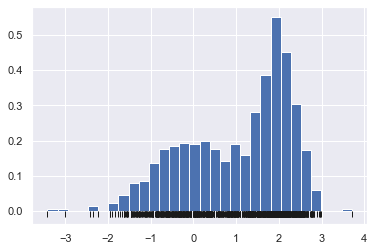

In [56]:
plt.hist(x, bins=30, density=True)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.show()

In [57]:
kd = KernelDensity(0.3, kernel='gaussian')
kd.fit(x[:, None])

/Users/oskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass bandwidth=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KernelDensity(bandwidth=0.3)

In [58]:
xx = np.linspace(-3,4,1000)
prob = np.exp(kd.score_samples(xx[:, None]))

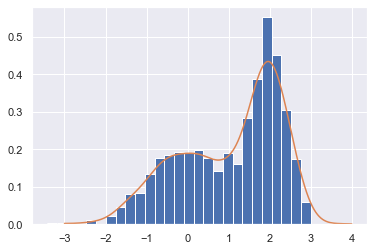

In [59]:
plt.hist(x, bins=30, density=True)
plt.plot(xx, prob)
# plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.show()

# Cross validate bandwidth

In [60]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

In [61]:
bandwidths = 10 ** np.linspace(-1,-0.5,100)
grid = GridSearchCV(
    KernelDensity(kernel='gaussian'), 
    {'bandwidth':bandwidths},
    cv=KFold(5, shuffle=True)
    )
grid.fit(x[:, None])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.1       , 0.10116971, 0.1023531 , 0.10355034, 0.10476158,
       0.10598698, 0.10722672, 0.10848096, 0.10974988, 0.11103363,
       0.1123324 , 0.11364637, 0.1149757 , 0.11632058, 0.1176812 ,
       0.11905772, 0.12045035, 0.12185927, 0.12328467, 0.12472675,
       0.12618569, 0.127661...
       0.21295254, 0.21544347, 0.21796353, 0.22051307, 0.22309244,
       0.22570197, 0.22834203, 0.23101297, 0.23371515, 0.23644894,
       0.23921471, 0.24201283, 0.24484367, 0.24770764, 0.2506051 ,
       0.25353645, 0.25650209, 0.25950242, 0.26253785, 0.26560878,
       0.26871563, 0.27185882, 0.27503878, 0.27825594, 0.28151073,
       0.28480359, 0.28813496, 0.29150531, 0.29491507, 0.29836472,
       0.30185473, 0.30538555, 0.30895768, 0.31257158, 0.31622777])})

In [62]:
kd_best = KernelDensity(**grid.best_params_)
kd_best.fit(x[:, None])
prob_best = np.exp(kd_best.score_samples(xx[:, None]))
print(grid.best_params_)

{'bandwidth': 0.26560877829466867}


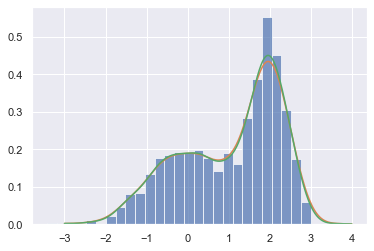

In [63]:
plt.hist(x, bins=30, density=True, alpha=0.7)
plt.plot(xx, prob)
plt.plot(xx, prob_best)
# plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.show()

# Try on real data

In [67]:
sm = pd.read_csv('data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)

<AxesSubplot:>

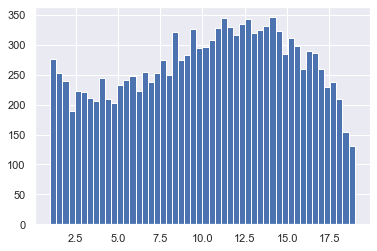

In [72]:
sm['q2'].hist(bins=50)

In [76]:
bandwidths = 10 ** np.linspace(-2,1,10)
grid = GridSearchCV(
    KernelDensity(kernel='gaussian'), 
    {'bandwidth':bandwidths},
    cv=LeaveOneOut()
    )
grid.fit(sm[['q2']])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.01      ,  0.01268961,  0.01610262,  0.0204336 ,  0.02592944,
        0.03290345,  0.04175319,  0.05298317,  0.06723358,  0.08531679,
        0.10826367,  0.13738238,  0.17433288,  0.22122163,  0.28072162,
        0.35622479,  0.45203537,  0.57361525,  0.72789538,  0.92367086,
        1.1721023 ,  1.48735211,  1.88739182,  2.39502662,  3.03919538,
        3.85662042,  4.89390092,  6.21016942,  7.88046282, 10.        ])})

In [124]:
xx = np.linspace(0,19, 1000)
kd_sm = KernelDensity(**grid.best_params_)
# kd_sm = KernelDensity(bandwidth=1, kernel='gaussian')
kd_sm.fit(sm[['q2']])
prob_sm = np.exp(kd_sm.score_samples(xx[:, None]))
kd_sm = KernelDensity(bandwidth=1, kernel='gaussian')
kd_sm.fit(sm[['q2']][sm['q2'] > 1])
prob_sm_1 = np.exp(kd_sm.score_samples(xx[:, None]))
print(grid.best_params_)

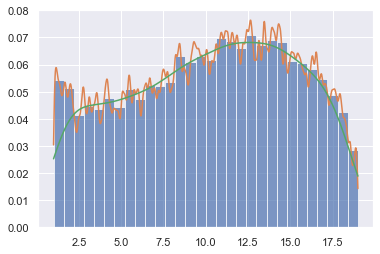

In [100]:
plt.hist(sm[['q2']], bins=30, density=True, alpha=0.7)
plt.plot(xx, prob_sm)
plt.plot(xx, prob_sm_1)
# plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.show()

In [93]:
sm[['q2']].min()

q2    1.002555
dtype: float64

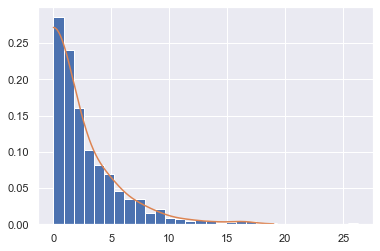

In [126]:
x_exp = np.random.exponential(3,1000)
kdexp = KernelDensity(bandwidth=1, kernel='gaussian').fit(np.append(x_exp, -x_exp)[:,None])
plt.hist(x_exp,density=True,bins=30)
plt.plot(xx[:,None], np.exp(kdexp.score_samples(xx[:,None])) * 2)

<ipython-input-131-a6b5f3d04ae2>:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(sm['q2'], sm['l'], bins=30)


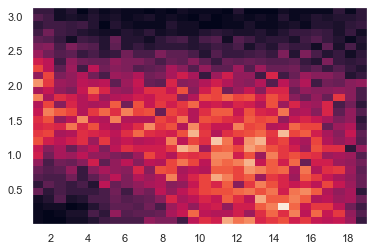

In [131]:
plt.hist2d(sm['q2'], sm['l'], bins=30)
plt.show()

<AxesSubplot:xlabel='q2', ylabel='l'>

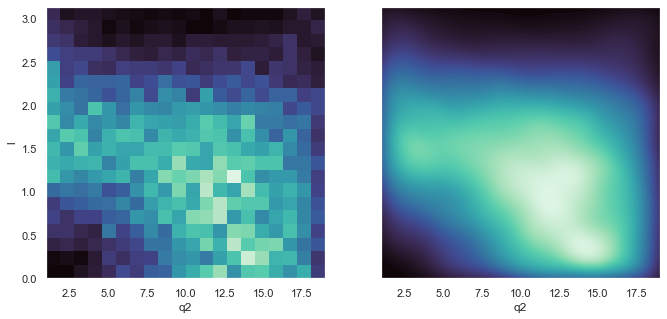

In [326]:
fig, axs = plt.subplots(1,2, figsize=(11,5), sharex=True, sharey=True, )
sns.histplot(sm, x='q2', y='l', cmap='mako', bins=20, ax=axs[0])
sns.kdeplot(
    data=sm.iloc[:], x='q2', y='l', 
    fill=True, thresh=0, cmap='mako', levels=1000, clip=((1,19),(0,np.pi)),
    ax=axs[1]
)

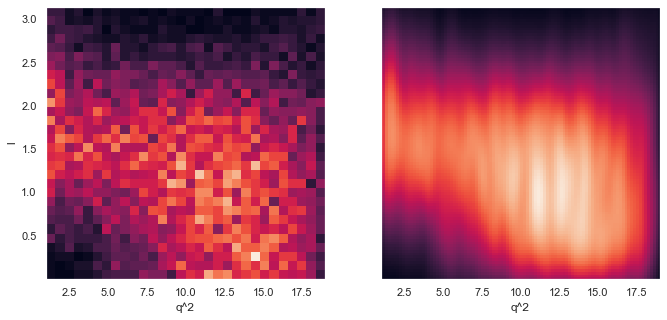

In [332]:
x, y = sm['q2'].values, sm['l'].values

xx, yy, zz = kde2D(x, y, 0.3, 100j, 100j)

fig, axs = plt.subplots(1,2, figsize=(11,5), sharex=True, sharey=True)
plt.grid(False)
axs[0].grid(False)
axs[0].hist2d(sm['q2'], sm['l'], bins=30)
axs[1].pcolormesh(xx, yy, zz)

axs[0].set_xlabel('q^2')
axs[1].set_xlabel('q^2')
axs[0].set_ylabel('l')
plt.show()
# plt.scatter(x, y, s=2, facecolor='white')


In [266]:
x = np.linspace(-1,1,10)
y = np.linspace(1,19,10)
xx, yy = np.meshgrid(x, y)
points = np.vstack([xx.ravel(), yy.ravel()]).T
# x = points[:,0]
# y = points[:,1]
# z = xx ** 2 + yy ** 2

In [273]:
# x_2d = np.
# kd_sm = KernelDensity(**grid.best_params_)
kd_sm = KernelDensity(bandwidth=3, kernel='gaussian')
kd_sm.fit(sm[['q2', 'l']].values)
prob_sm = np.exp(kd_sm.score_samples(points))

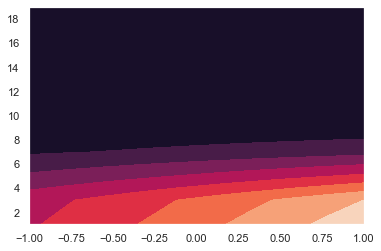

In [274]:
plt.contourf(x, y, prob_sm.reshape(10,10))

In [321]:
def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)